<a href="https://colab.research.google.com/github/Migaalee/PAD/blob/main/PAD_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description

## Explanation of the dataset.

### Upload data and setup 

(files is here: https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_Quantity_kg_Data.csv). Download all 32 columns. 
During this tutorial we will be using Python and make use of the following libraries:

In [ ]:
# Warning for handling warning messages
import warnings
warnings.filterwarnings(action='ignore')
# https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

In [ ]:
!pip install plotly==4.0.0

     |████████████████████████████████| 6.8MB 14.7MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.0.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Stats modules
import statsmodels.api as sm
import scipy.stats as stats

# Auxiliar libraries
from sklearn.metrics import r2_score



In [ ]:
### SSTotal
def ss_total(y):
    return np.sum((y - np.mean(y))**2)

### SSResiduals & SSErrors
# Watch out for broadcast effects
# y shape is (209,) and predictions shape is (209,1)
# shapes have to agree when using element-wise operations in numpy
# in this case, we will just reshape predictions to (209,)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred[:,0] - np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y - pred[:,0])**2)

In [ ]:
# load the text file
url = 'https://raw.githubusercontent.com/Migaalee/PAD/main/Food_Supply_Quantity_kg_Data_filtered.csv'
data = pd.read_csv(url)
data.shape
# Dataset is now stored in a Pandas Dataframe

(119, 10)

## Check how data is organised.

In [ ]:
my_list = list(data)

print (my_list)

['Alcoholic Beverages', 'Animal Products', 'Fish, Seafood', 'Stimulants', 'Sugar & Sweeteners', 'Vegetal Products', 'Obesity', 'Confirmed', 'Deaths', 'Recovered']


In [ ]:
x = data[['Vegetal Products']].values
y = data[['Confirmed']].values


# 2. Regression Analysis

## Module I - Linear Regression Tutorial





### Tasks


- a) Select two features in your dataset with more or less “linear‐like” scatterplot. Display the scatter‐
plot, and make a comment on it.

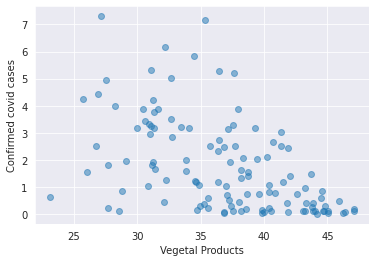

In [ ]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases');

In [ ]:
print(x.shape)
print(y.shape)


(119, 1)
(119, 1)


Estimate coefficient beta0 (both ways should match)

In [ ]:
# re-importing to ease readability
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

beta = dot(dot(inv(dot(x.T, x)),x.T),y) 
print('Estimated coefficient:', beta[0])

Estimated coefficient: [0.04339053]


In [ ]:
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta[0])

Estimated coefficients: [0.04339053]


- b) Build a linear regression of one of the features over the other. Obtain a normal probability plot of 
the standardized residuals from this regression. Does the normal probability plot indicate 
acceptable normality, or is there any skewness? If a skewness, what is the type of it?

This is our simple regression $$Y = \beta X + \epsilon$$
without intercept

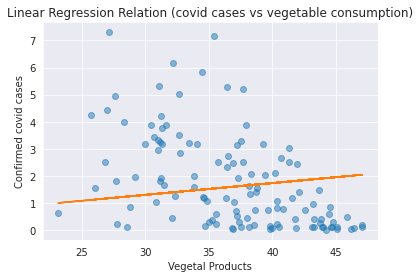

In [ ]:
predictions = x * (beta) # making use of numpy's broadcast
predictions_withouth_intercept = predictions
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (covid cases vs vegetable consumption)');
plt.plot(x, predictions) # overlay a line plot over a scatter plot 
plt.show()


Now lets improve the fit by adding ntercept term $\beta_0$ in your model as $\hat{Y} = \beta_0 + \beta_1X$.  To do this we need to calculate  $\beta_0$ by padding $X$ with a column of ones.

In [ ]:
ones_vector = np.ones(len(x)) 

# append constant term as a column of x
x = np.c_[ones_vector, x]

print(x[:5])




[[ 1.     27.1612]
 [ 1.     35.3838]
 [ 1.     32.1944]
 [ 1.     34.4636]
 [ 1.     31.0774]]


In [ ]:
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

# to use the dot product function we have to state that the coefficients vector is of the shape (2,1)
print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
print('New shape of coefficients array:',beta.shape)


Estimated coefficients: [[ 7.60362259]
 [-0.1583189 ]]
Old shape of coefficients array: (2, 1)
New shape of coefficients array: (2, 1)


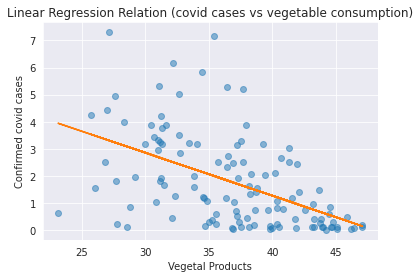

In [ ]:
# compute new predictions
predictions_with_intercept = dot(x,beta) 

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (covid cases vs vegetable consumption)');
plt.plot(x[:,1], predictions_with_intercept) # overlay a line plot over a scatter plot 
plt.show()

In [ ]:
print(x.shape)
print(y.shape)

(119, 2)
(119, 1)


Until here all good - do not change above lines

Obtain a normal probability plot of the standardized residuals from this regression.

In [ ]:
print(predictions.shape)
print(predictions.shape)
print(predictions_withouth_intercept.shape)
print(predictions_with_intercept.shape)
print(x.shape)
print(y.shape)
print(beta.shape)
y1=y[:,0]
print(y1.shape)

(119, 1)
(119, 1)
(119, 1)
(119, 1)
(119, 2)
(119, 1)
(2, 1)
(119,)


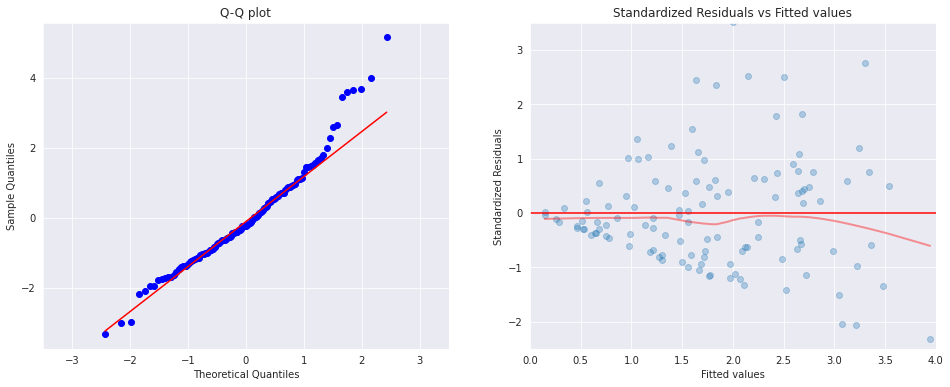

In [ ]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y1 - predictions_with_intercept[:,0]
degrees_of_freedom = len(y1) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x[:,1])
leverage = ( (1/len(x)) 
             + (((x[:,1] - mean_independent_variable)**2) 
                / np.sum((x[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-2.5,3.5)
axs[1].set_xlim(0,4)

axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

Does the normal probability plot indicate acceptable normality, or is there any skewness?

If a skewness, what is the type of it?
Normal probability plot (QQplot) indicates that residuals are slightly skewed and might be because of few outliers in the dataset. The condition that the error terms are normally distributed by visual representation is not met. However, additional tests for normality should be considered (e.g. Shapiro-Wilks normality test).

- c) Take the natural log of both of the variables and perform a linear regression on the transformed 
features. Obtain a normal probability plot of the standardized residuals from this regression. Discuss 
if this probability plot indicates an acceptable level of normality?

In [ ]:
mask = y1 != 0
y_masked = y1[mask]
x_masked = x[mask]
y_masked = np.log(y_masked)
x_masked = np.log(x_masked)

Estimated coefficients: [ 0.         -0.05103439]


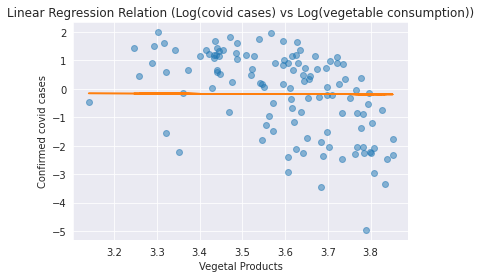

In [ ]:
# estimate the coefficients
beta = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions = dot(x_masked,beta) 

ax = sns.regplot(x=x_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (Log(covid cases) vs Log(vegetable consumption))');
plt.plot(x_masked[:,1], predictions) # overlay a line plot over a scatter plot 
plt.show()



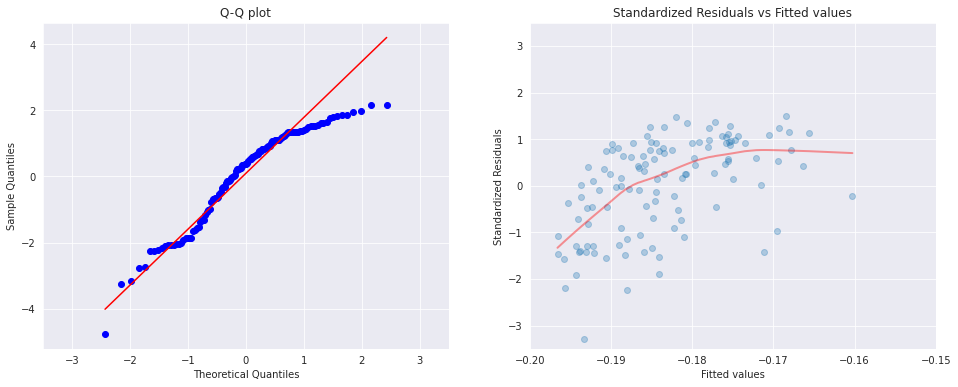

In [ ]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x_masked,beta)
residuals = y_masked - predictions[:,0]
degrees_of_freedom = len(y_masked) - x_masked.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x_masked[:,1])
leverage = ( (1/len(x_masked)) 
             + (((x_masked[:,1] - mean_independent_variable)**2) 
                / np.sum((x_masked[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(-0.2,-0.15)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

Transformed only Y values instead of both values

In [ ]:
mask = y1 != 0
y_masked = y1[mask]
x_masked1 = x[mask]
y_masked = np.log(y_masked)


Estimated coefficients: [ 5.10907811 -0.14270815]


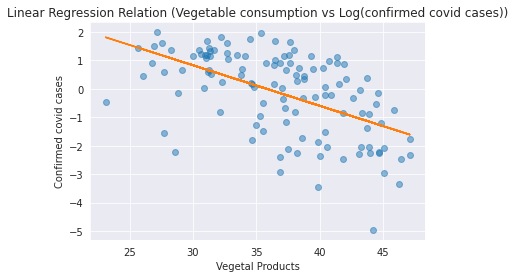

In [ ]:
# estimate the coefficients
beta = np.linalg.lstsq(x_masked1, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions = dot(x_masked1,beta) 

ax = sns.regplot(x=x_masked1[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Vegetal Products', 
       ylabel='Confirmed covid cases',
       title='Linear Regression Relation (Vegetable consumption vs Log(confirmed covid cases))');
plt.plot(x_masked1[:,1], predictions) # overlay a line plot over a scatter plot 
plt.show()



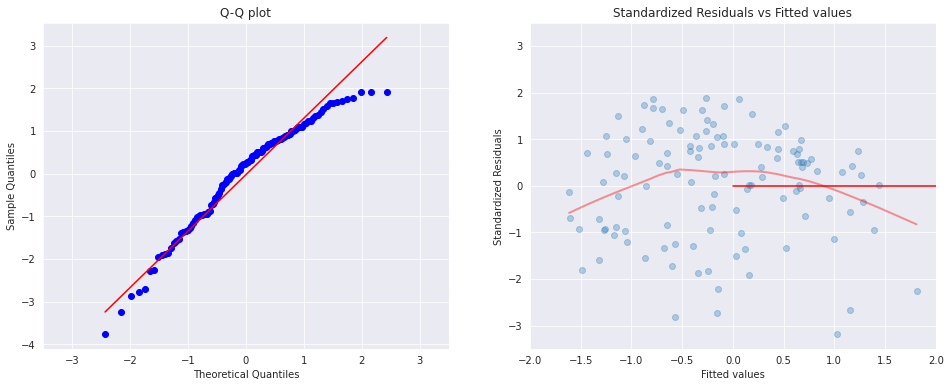

In [ ]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x_masked1,beta)
residuals = y_masked - predictions[:,0]
degrees_of_freedom = len(y_masked) - x_masked1.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt( (1/degrees_of_freedom) *  np.sum(residuals ** 2))
mean_independent_variable = np.mean(x_masked1[:,1])
leverage = ( (1/len(x_masked1)) 
             + (((x_masked[:,1] - mean_independent_variable)**2) 
                / np.sum((x_masked1[:,1] - mean_independent_variable)**2)) )
standardized_rediduals = residuals / (residuals_standard_error * np.sqrt( 1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
plt.plot(np.arange(len(standardized_rediduals)), [0]*len(standardized_rediduals), 'r-')
axs[1].set_ylim(-3.5,3.5)
axs[1].set_xlim(-2,2)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');

QQplot after log transformation of data indicates that residuals are still skewed, hence the condition that the error terms are normally distributed is not met. However, additional tests for normality should be considered (e.g. Shapiro-Wilks normality test).

Coefficient for determinancy for log transformed (y) data

In [ ]:
# SStotal
sstotallog = ss_total(y_masked)

# SSReg
ssreglog = ss_reg(predictions, y_masked)

# SSRes
ssreslog = ss_res(predictions, y_masked)

### R^2
rsqlog = 1 - (ssreslog / sstotallog)

print('SStotal:', round(sstotallog,4))
print('SSreg:', round(ssreglog,4))
print('SSres:', round(ssreslog,4))
print('Coefficient of Determinacy:', np.round(rsqlog,2))

SStotal: 251.0691
SSreg: 74.9392
SSres: 176.1299
Coefficient of Determinacy: 0.3


Log transforming the data does improves determinancy coefficient from 0.27 to 0.3.

- d) Write the population regression equation for your model. Interpret the meaning of the values of 
the parameters beta0 and beta1

Population regression model $\hat{Y} = \beta_0 + \beta_1X + u$, is a linear function that shows theoretical relationship between a dependable variable  $\hat{Y}$ and explanatory variable ${X}$, where $\beta_0$ is an intercept and  $\beta_1$ is a slope coefficient. In population regression model $u$ term is introduced as stochastic error term. To express how number of confirmed covid cases correlates with consumption of vegetable products, our model can be re-written as $\hat{Y}_{covid} = 7.6036 -0.1583X_{vegetables} + u$ in a linear scale and in logarithmic scale $\hat{Y}_{covid} = 5.1090 -0.1427X_{vegetables} +u$. 

- e) Find the correlation and determinacy coefficients. Analyse and comment on  the meaning of both.


Rsquare can be checked this way.

In [ ]:
print('Coefficient of Determinacy:',round(r2_score(y_true=y, y_pred=predictions_with_intercept),2))
print('Coefficient of Determinacy for y-logged data:',round(r2_score(y_true=y_masked, y_pred=predictions),2))

Coefficient of Determinacy: 0.27
Coefficient of Determinacy for y-logged data: 0.3


R2 of a model is 0.30, so approximately 30% of the observed variation can be explained by the model's inputs.

Or this way:

In [ ]:
### SSTotal
def ss_total(y):
    return np.sum((y - np.mean(y))**2)

### SSResiduals & SSErrors
# Watch out for broadcast effects
# y shape is (209,) and predictions shape is (209,1)
# shapes have to agree when using element-wise operations in numpy
# in this case, we will just reshape predictions to (209,)

# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    return np.sum((pred[:,0] - np.mean(y))**2)

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    return np.sum((y - pred[:,0])**2) 

# SStotal
sstotal = ss_total(y1)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y1) - 1 ) * np.var(y1, ddof=1) 

# SSReg
ssreg = ss_reg(predictions_with_intercept, y1)

# SSRes
ssres = ss_res(predictions_with_intercept, y1)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

SStotal: 346.0593
SSreg: 92.231
SSres: 253.8283
Coefficient of Determinacy, model with intercept: 0.27


In [ ]:
# SStotal
sstotal = ss_total(y_masked)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y_masked) - 1 ) * np.var(y_masked, ddof=1) 

# SSReg
ssreg = ss_reg(predictions, y_masked)

# SSRes
ssres = ss_res(predictions, y_masked)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept when y-logged:', np.round(rsq_with_intercept,2))

SStotal: 251.0691
SSreg: 74.9392
SSres: 176.1299
Coefficient of Determinacy, model with intercept when y-logged: 0.3


Calculate correlation coefficient

In [ ]:
print('Correlation in linear model:',np.corrcoef(y1,x_masked[:,1])[0,1])
print('Correlation in logged model:',np.corrcoef(y_masked,x_masked[:,1])[0,1])

Correlation in linear model: -0.5020748354015256
Correlation in logged model: -0.5240593267385711


ALL CONFIRMED UNTIL HERE

In [ ]:
sigma_degrees_of_freedom = (x_masked1.shape[0]-x_masked1.shape[1])
sigma_sqr = np.sum(residuals**2)/ sigma_degrees_of_freedom

variance_covmatrix = inv(dot(x_masked1.T,x_masked1)) * sigma_sqr
coeff_stde = np.diag(np.sqrt(variance_covmatrix))

print('Coefficients\' Standard Errors for beta0(y-intercept) and beta1(slope) :',coeff_stde)
expected_value = 0.0

for i in range(len(beta)):    
    ttest = (beta[i] - expected_value) / coeff_stde[i]

    #Degrees of freedom
    df = x_masked.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', np.round(pval,8))
    print(sigma_degrees_of_freedom)

Coefficients' Standard Errors for beta0(y-intercept) and beta1(slope) : [0.75391929 0.02022637]
Test statistc for coefficient estimate  0 : [6.77669109] | P-value: [0.]
117
Test statistc for coefficient estimate  1 : [-7.05554887] | P-value: [0.]
117




```
# This is formatted as code
```

- f) Test the statistical hypothesis for determining whether a linear relationship exists between the 
chosen variables.


Test if beta0=0, how do we get F from this code?

Test statistc for coefficient estimate  0 : [6.77669109] | P-value: [0.]
Test statistc for coefficient estimate  1 : [-7.05554887] | P-value: [0.]


- g) Construct and interpret a 95% confidence interval for the unknown true slope of the regression line

- h) Construct a 95% confidence interval for the population correlation 



coefficient. Interpret the results.

- i) Construct and interpret a 95% confidence interval for the mean of the y‐variable at a fixed value of 
your choice of the other variable. Interpret your result and indicate if the prediction interval is 
useful.

- j) Construct and interpret a 95% confidence interval for a randomly chosen value of the y‐variable at 
a fixed value of your choice of the other variable. Interpret your result and indicate if the prediction 
interval is useful.

Just testing area below

In [ ]:
sstotal = np.sum(y1**2)
ssreg = np.sum(predictions[:,0]**2)
ssres = ss_res(predictions, y1)


### R^2
rsq_without_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model without intercept:', np.round(rsq_without_intercept,2))


SStotal: 718.2302
SSreg: 77.6421
SSres: 693.0318
Coefficient of Determinacy, model without intercept: 0.04


NOTES: there was some problem with some code and we should use this somewhere: !pip install plotly==4.0.0


# 3. Principal Component Analysis
## Select a subset of 3 to 6 features related to the same aspect of the phenomenon to which your data set relates to. Explain your choice.
 We have selected Stimulants, Alcohol, Sugar, Vegetable and Animal products for PCA analysis to see if healthier food consumption (vegetable consumption) would be separated from unhealthy foods. 


### Tasks

- a) Visualize the data over these features in 2D/3D PC plane using two types of normalization: by range and by standard deviations.

Note: Choosing Stimulants, Alcohol, Sugar, Vegetable and Animal products for PCA analysis 

- b) Choose between conventional PCA or SVD for the visualization. Make a comment whether one of 
the normalizations is better and why

- c) At these visualizations, use a distinct shape/colour for data points representing a pre‐specified, by yourself, group of objects. Comment on the choice of your groups.

- d) Calculate and make a graphical presentation of the “quality” of the PC projection of your data. Discuss your results.


# 4. Fuzzy Clustering with Anomalous Patterns


###Tasks

a) Study the fuzzy c-means (FCM) program in the software package of your choice. Apply the program to your dataset at the same c parameter with random seeds. Do this for several different values of parameter c= c_min, ..., c_max. Plot the FCM clustering criterion (FCM cost function) in function of c. Analyse the graphic and comment if any number of clusters better fits your data than the others.

NOTES: she said for e) if our data is unlabeled do not do Adjust rand index, instead other index could be used (Silhoutte?)